In [3]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [5]:
file = "DatosFinales.xlsx"
inhabitants = "Poblacion.xlsx"
traffic = "TRAFICO.xlsx"
sheet = "Completo"

df = pd.read_excel(file, sheet_name=sheet)
df_inhabitants = pd.read_excel(inhabitants)
df_traffic = pd.read_excel(traffic)

In [6]:
dfMA=df.groupby(pd.Grouper(key='Fecha', freq='Y')).mean()

In [7]:
places=["Barcelona, L'Eixample", "Paterna", "Málaga", "Bilbao, Parque Europa", "Cádiz", "Gijón", "Almería", "Palma", "Tenerife", "Cáceres, Toril", "Madrid, Plaza de España", "Albacete", "Burgos, Plaza lavaderos", "Zaragoza, Roger de la Flor", "Sevilla, La ranilla", "Valladolid, Arco de Ladrillo", "Badajoz", "Igualada, La Masuca (Barcelona)", "El Grao de Castellón", "Vigo, Estación 1, Avda Citröen"]
chems=["C6H6", "CO", "NO", "NOx", "NO2", "SO2", "PM10", "PM25", "O3"]

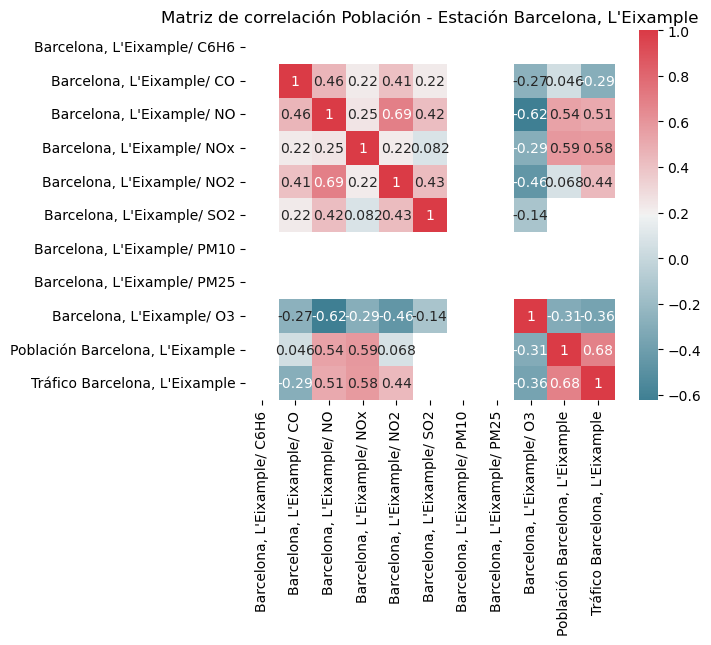

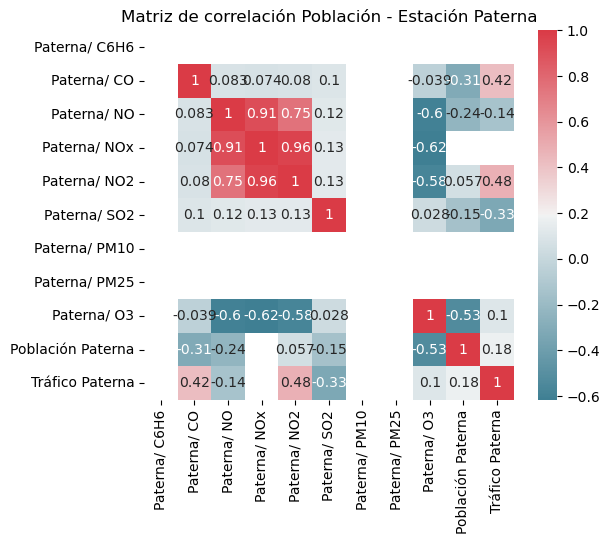

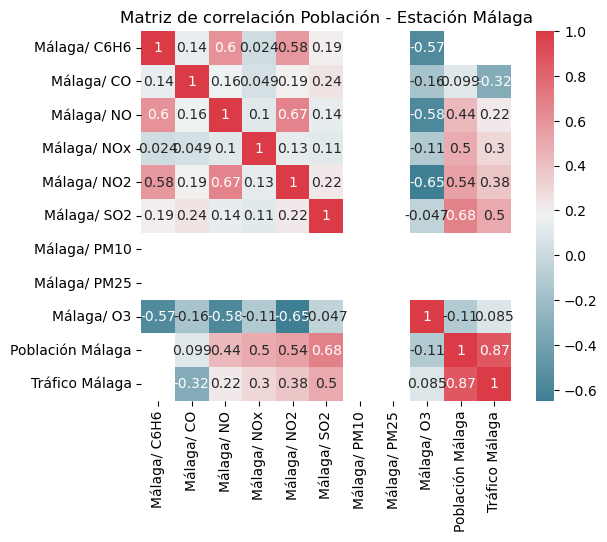

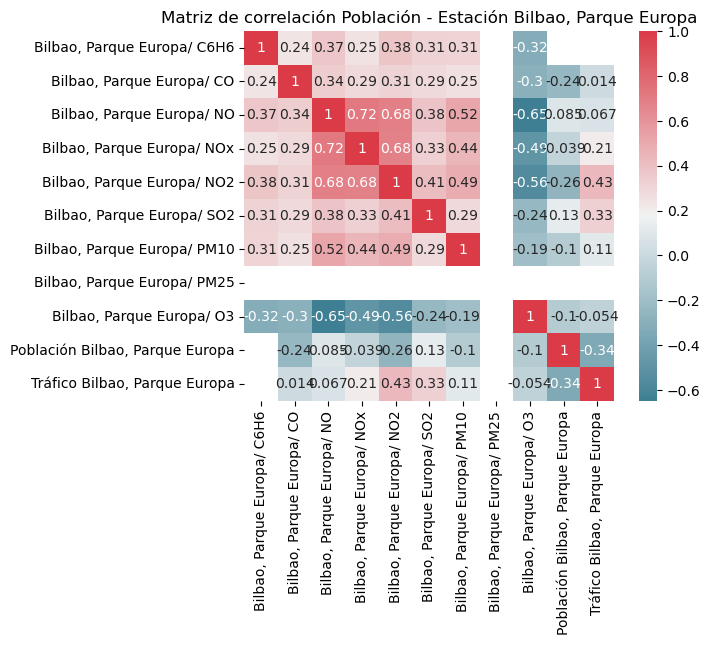

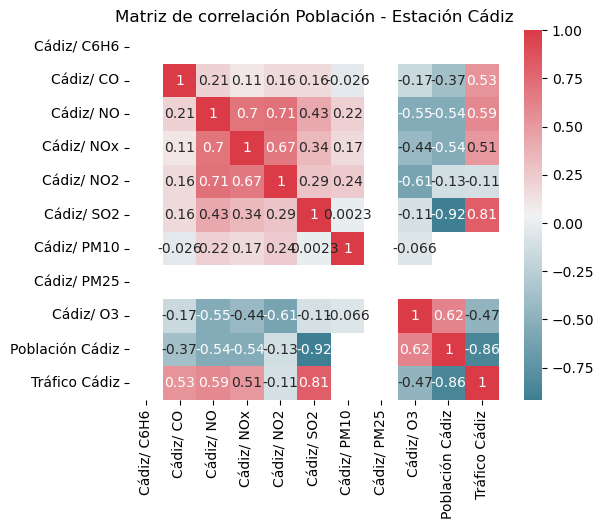

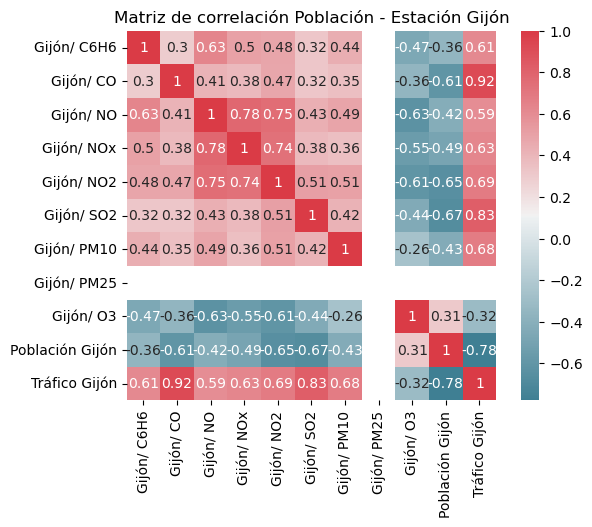

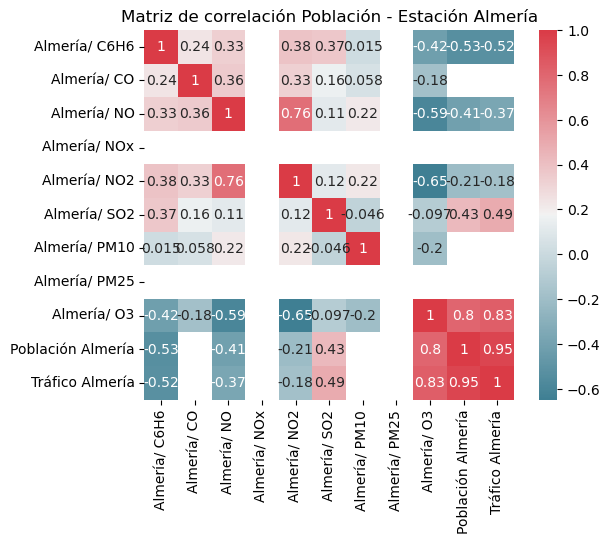

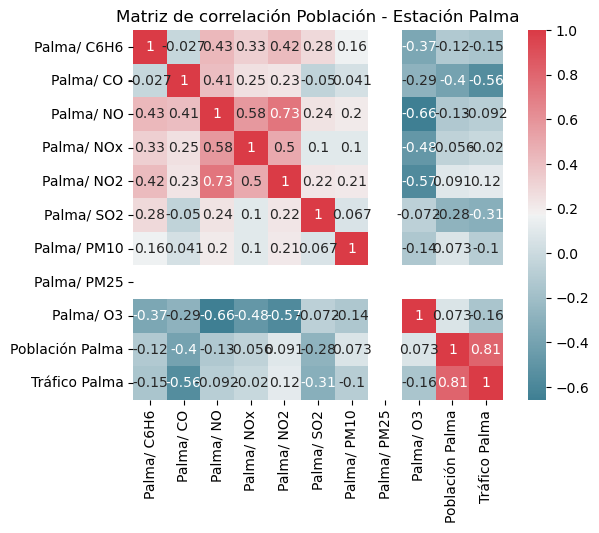

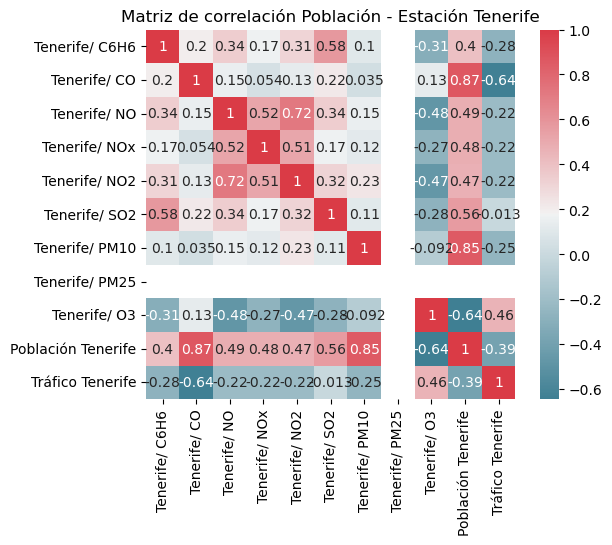

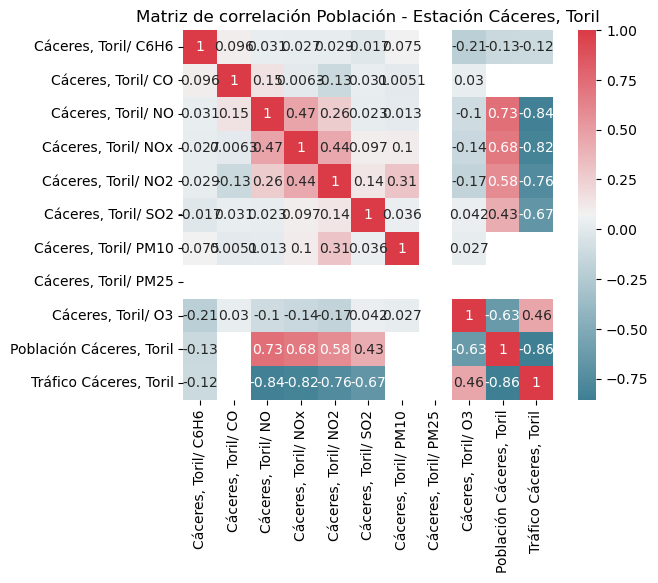

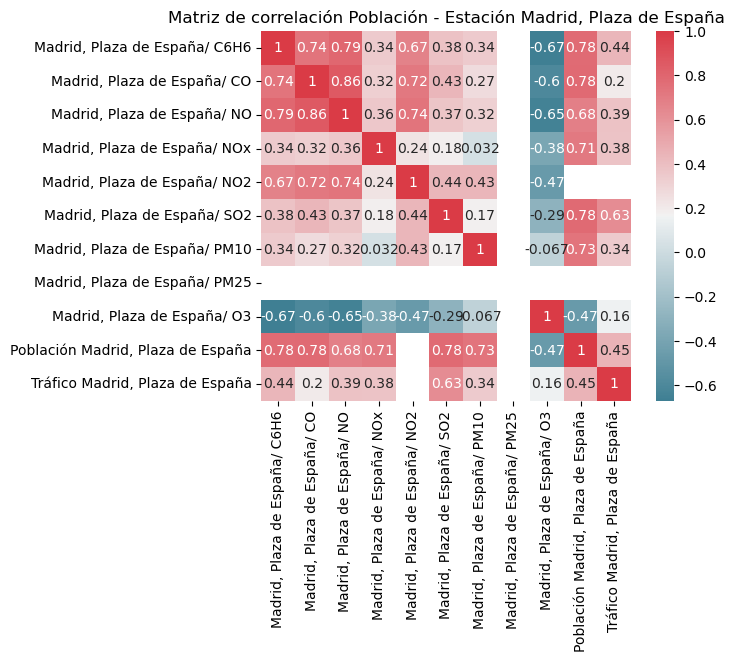

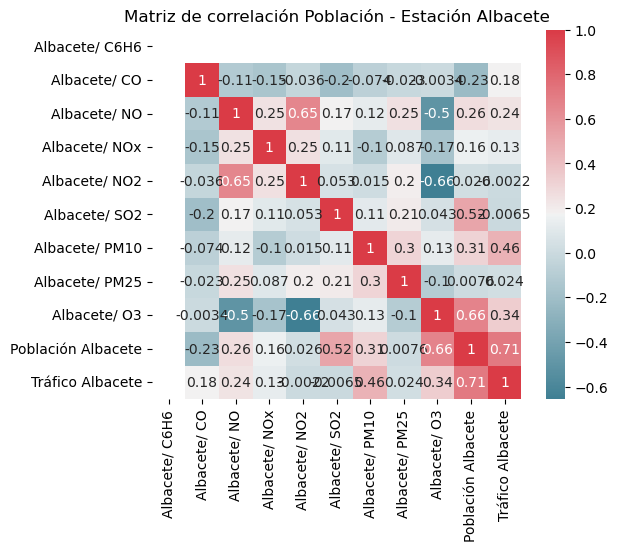

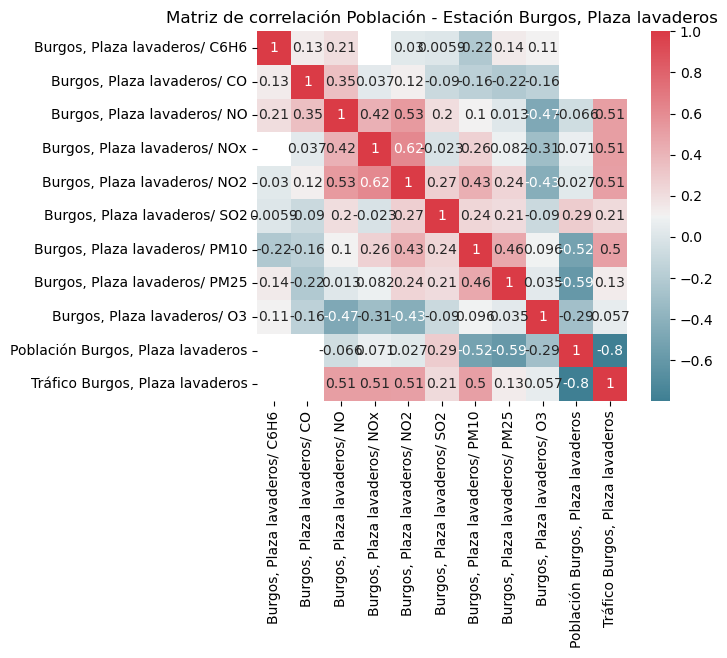

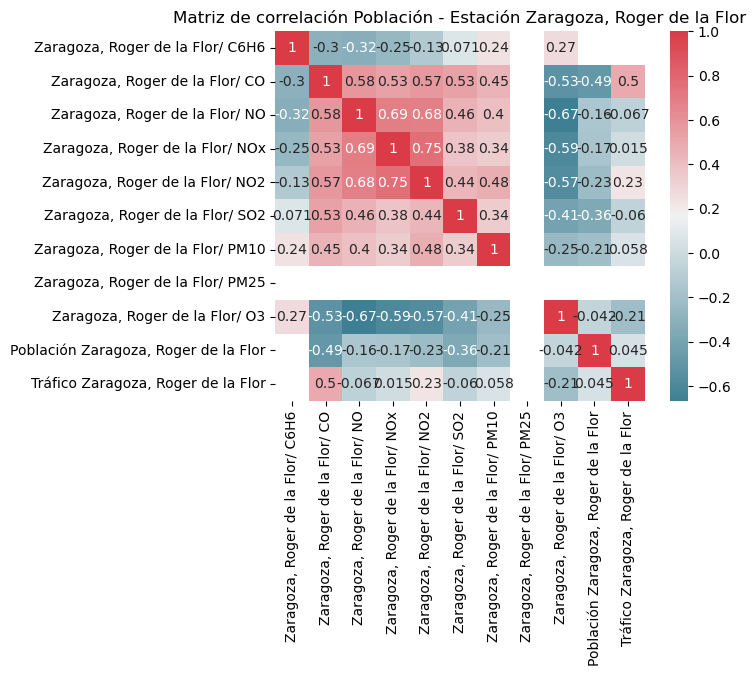

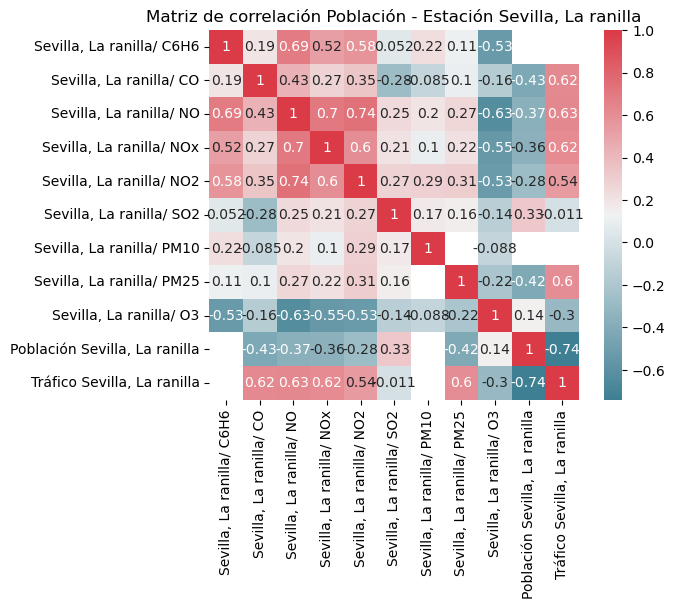

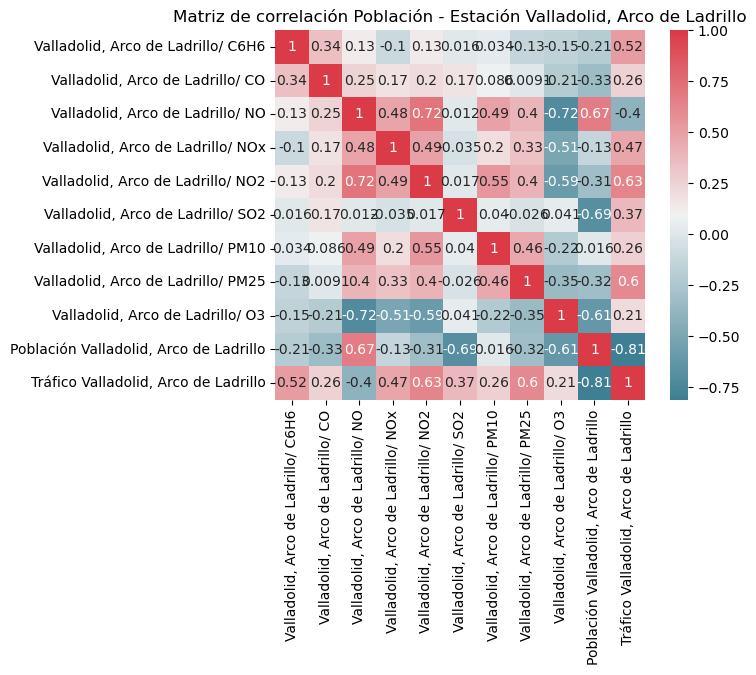

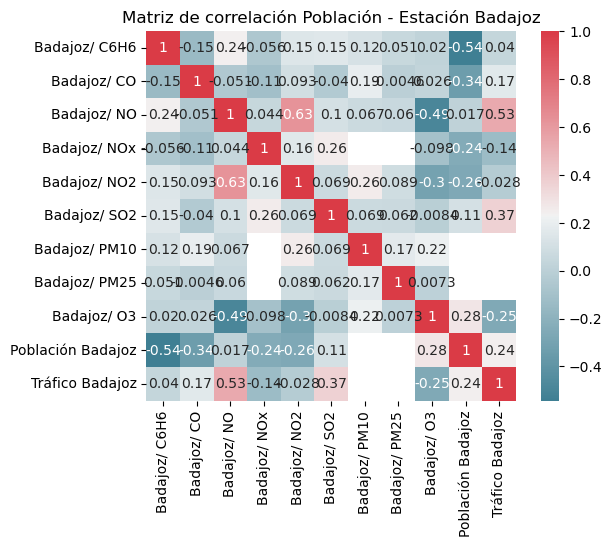

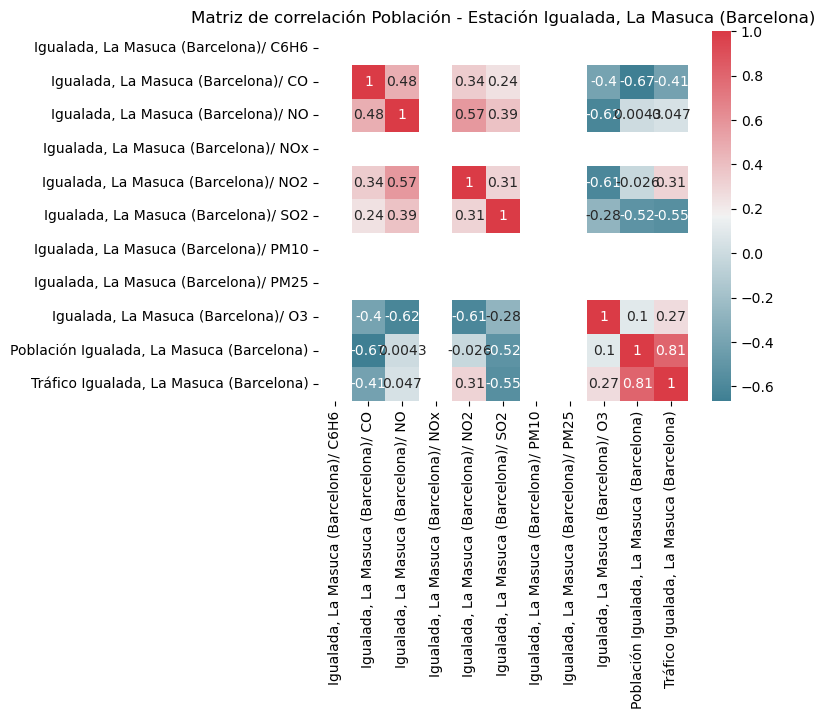

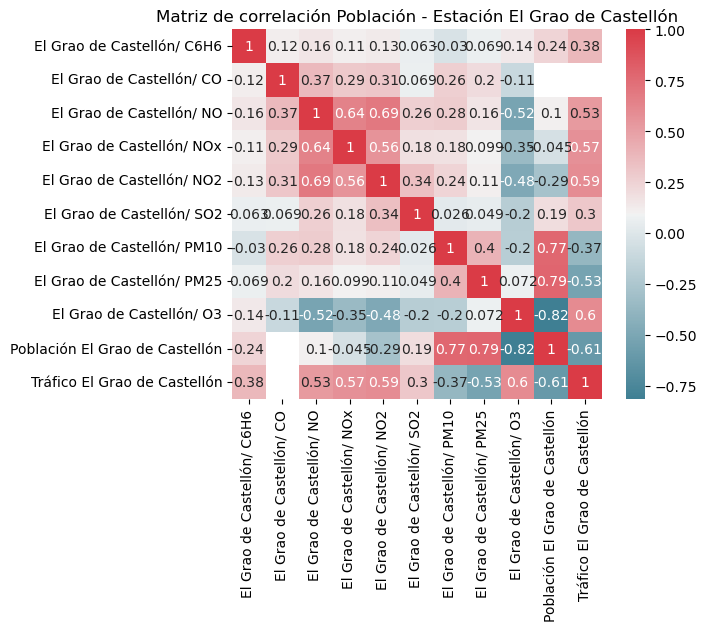

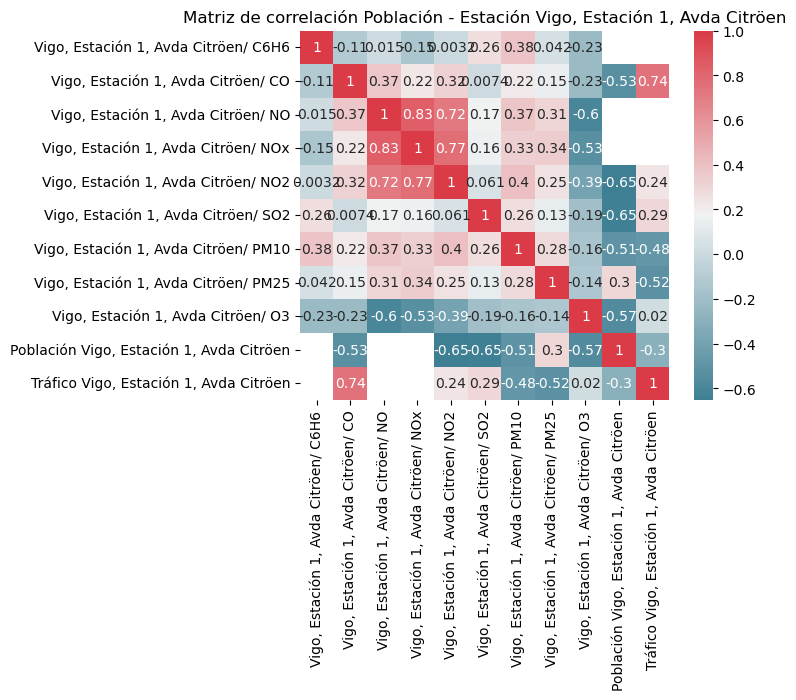

In [9]:
#Printing the correlation matrixes

for place in places:
    df_aux=pd.DataFrame()
    for chem in chems:
        df_aux[place+"/ "+chem]=df[place+"/ "+chem]
        
    df_aux2 = pd.concat([df_aux, df_inhabitants[place]], axis=1)
    df_aux2 = df_aux2.rename(columns={place: 'Población ' + place})
    df_aux2 = pd.concat([df_aux2, df_traffic[place]], axis=1)
    df_aux2 = df_aux2.rename(columns={place: 'Tráfico ' + place})
    
    corr_matriz=df_aux2.corr()
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr_matriz, annot=True, cmap=cmap, square=True)
    plt.title(f'Matriz de correlación Población - Estación {place}')
    plt.show()